In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/datsoftlyngby/soft2019spring-ai/master/projects/project1/users.json'
df = pd.read_json(url)
df.head(10)

,about,created,error,id,karma,submitted
0,NaN,1.510266e+09,NaN,gcgggfxsdg,-1.0,5
1,"Ruby, Open Source, Devops",1.325548e+09,NaN,sheerun,102.0,51
2,NaN,1.459331e+09,NaN,keypress,79.0,70
3,[ my public key: https:&#x2F;&#x2F;keybase.io&...,1.379698e+09,NaN,pyprism,1356.0,114
4,Email: ejstronge@gmail.com\nGithub: https:&#x2...,1.355740e+09,NaN,ejstronge,460.0,144
5,NaN,1.276201e+09,NaN,akira2501,880.0,304
6,NaN,1.382222e+09,NaN,matchagaucho,412.0,228
7,NaN,1.330724e+09,NaN,bberrry,273.0,49
8,NaN,1.475393e+09,NaN,sharjeelsidd,1.0,1
9,github.com&#x2F;allcentury,1.389810e+09,NaN,allcentury,56.0,41


In [4]:
xtime = df.loc[:, 'created']
df = df[df['created'].notnull()]
X = np.array(df['created']).reshape(9299, 1)

In [5]:
ypoint = df.loc[:, 'karma']
df = df[df['karma'].notnull()]
y = np.array(df['karma'])

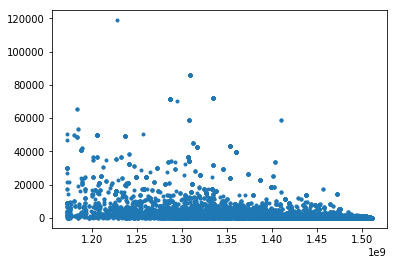

In [6]:
plt.plot(X, y, '.')

Model Selection: We've chosen to use a linear regression model because we can't exactly determine a correlation between the points gained and the time it takes to get to 1000, so we go with the suggested model by the assignment

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
prediction = model.predict(X_test)
prediction

array([6790.37378978, 7537.20219236, 7154.23331371, ..., 4639.63369152,
       5896.96447282, 5905.49106938])

In [10]:
len(prediction)

3069

In [11]:
coefficient = model.coef_
intercept = model.intercept_
print ("Coefficient:",coefficient)
print ("Intercept:",intercept)

Coefficient: [-3.70900589e-05]
Intercept: 55271.935993934676


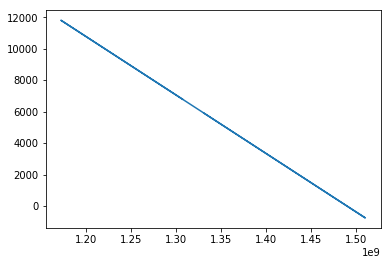

In [116]:
y_pred = prediction
plt.plot(X_test, y_pred)

Part 2

In [13]:
zpost = df.loc[:, 'submitted']
df = df[df['submitted'].notnull()]
Z = np.array(df['submitted']).reshape(9299, 1)

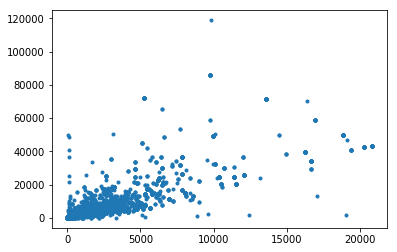

In [14]:
plt.plot(Z, y, '.')

In [15]:
Z_train, Z_test, yz_train, yz_test = train_test_split(Z, y, test_size=0.33, random_state=42, shuffle=True)

In [16]:
model_z = LinearRegression()
model_z.fit(Z_train, yz_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
prediction_z = model_z.predict(Z_test)
prediction_z

array([47095.14228734,  1122.05981496,   264.09487808, ...,
        1459.71053205,  8564.21373514,  3950.57647782])

In [18]:
len(prediction_z)

3069

In [19]:
coefficient_z = model_z.coef_
intercept_z = model_z.intercept_
print ("Coefficient:",coefficient_z)
print ("Intercept:",intercept_z)

Coefficient: [2.76762883]
Intercept: 214.27755916513388


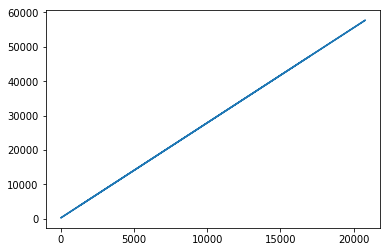

In [118]:
yz_pred = prediction_z
plt.plot(Z_test, yz_pred)

Using sklearn with multidimensional input and output samples (e.g. vectors)

In [21]:
X_1 = X.flatten()
X_2 = Z.flatten()
Y = y.flatten()

In [22]:
from pandas import DataFrame 

modelxyz = {'created': X_1, 'submitted': X_2, 'karma': Y}
df_m = DataFrame(modelxyz, columns=['created','submitted','karma'])
X_mutil = df_m[['created','submitted']].astype(object)
y_mutil = df_m['karma'].astype(object)

In [23]:
X_trainMutil, X_testMutil, y_trainMutil, y_testMutil = train_test_split(X_mutil, y_mutil, test_size=0.33, random_state=42, shuffle=True)

In [24]:
modelMutil = LinearRegression()
modelMutil.fit(X_trainMutil, y_trainMutil)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
predictionMutil = modelMutil.predict(X_testMutil)
predictionMutil

array([46330.21478189,  1790.29855459,   893.28291085, ...,
        1637.98991383,  8748.5827471 ,  4267.76016908])

In [26]:
len(predictionMutil)

3069

In [27]:
coefficientMutil = modelMutil.coef_
interceptMutil = modelMutil.intercept_
print ("Coefficient:",coefficientMutil)
print ("Intercept:",interceptMutil)

Coefficient: [-6.14858271e-06  2.68880388e+00]
Intercept: 8821.568305901803


3D

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

In [29]:
model3D = smf.ols(formula='submitted ~ created + karma', data=df_m)
results_formula = model3D.fit()
results_formula.params

Intercept    3291.708305
created        -0.000002
karma           0.250053
dtype: float64

In [30]:
x_surf, y_surf = np.meshgrid(np.linspace(df_m.created.min(), df_m.created.max(), 100),np.linspace(df_m.karma.min(), df_m.karma.max(), 100))
onlyX = DataFrame({'created': x_surf.ravel(), 'karma': y_surf.ravel()})
fittedY = results_formula.predict(exog=onlyX)

<IPython.core.display.Javascript object>


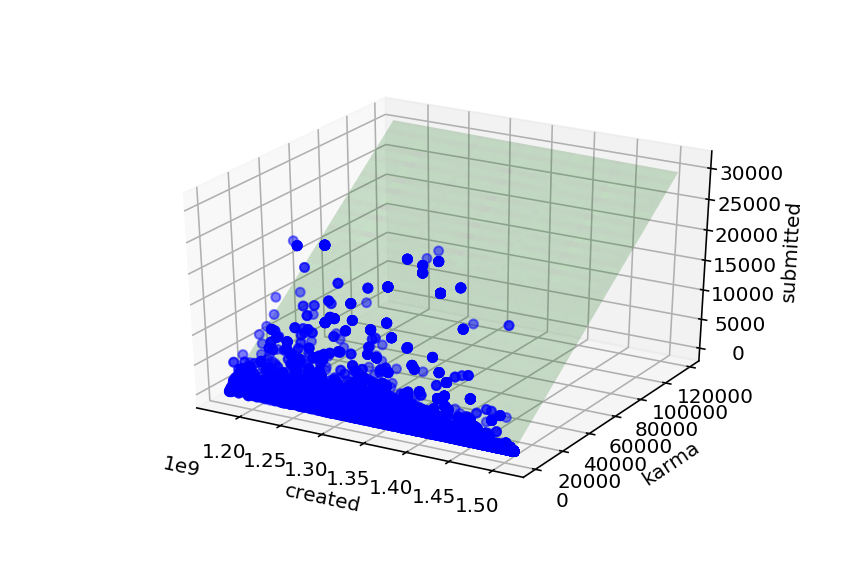

In [33]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_m['created'], df_m['karma'], df_m['submitted'], c='blue', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fittedY.values.reshape(x_surf.shape), color='green', alpha=0.2)
ax.set_xlabel('created')
ax.set_ylabel('karma')
ax.set_zlabel('submitted')
plt.show()

Part 3

In [ ]:
import os
import requests

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
filename = os.path.join('/tmp', os.path.basename(url))
r = requests.get(url)

with open(filename, 'wb') as f:
    f.write(r.content)

For MacOs

In [ ]:
%%bash
sed -i '.original' -e '1s;^;ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension\'$'\n;' /tmp/wdbc.data

For Linux

In [ ]:
%%bash
sed -i '1s;^;ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,Mean Fractal Dimension,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave Points SE,Symmetry SE,Fractal Dimension SE,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension\n;' /tmp/wdbc.data

In [ ]:
%%bash
head /tmp/wdbc.data

In [ ]:
data = pd.read_csv('/tmp/wdbc.data')
data.head()

Page is down, we are now using a backup dataset.

In [50]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Notice when you use the origngal dataset, remember to change the column name, because they are different.

In [51]:
len(data)

569

Area and Concavity reason:

In [52]:
import seaborn as sns
%matplotlib inline

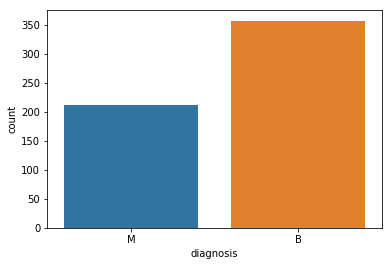

In [53]:
sns.countplot(x='diagnosis', data=data)

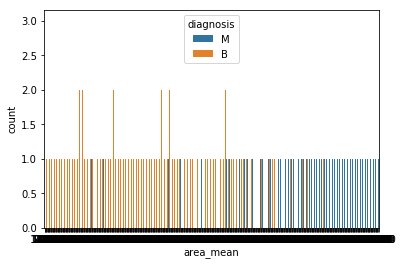

In [54]:
sns.countplot(x='area_mean',hue='diagnosis',data=data)

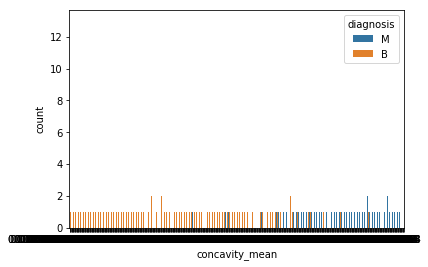

In [55]:
sns.countplot(x='concavity_mean',hue='diagnosis',data=data)

Next step is not necessary for origngal dataset

In [63]:
data.drop('Unnamed: 32',axis=1,inplace=True)

Origngal dataset starts again from here (using all parameters from dataset to train the model)

In [66]:
X_trainlogi, X_testlogi, y_trainlogi, y_testlogi = train_test_split(data.drop('diagnosis',axis=1),data['diagnosis'],test_size=0.33,random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
logimodel = LogisticRegression()
logimodel.fit(X_trainlogi, y_trainlogi)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
prediction_logi = logimodel.predict(X_testlogi)
prediction_logi

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_testlogi,prediction_logi))

              precision    recall  f1-score   support

           B       0.50      0.02      0.03       121
           M       0.35      0.97      0.52        67

   micro avg       0.36      0.36      0.36       188
   macro avg       0.43      0.49      0.27       188
weighted avg       0.45      0.36      0.21       188



In [87]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_testlogi,prediction_logi)

In [86]:
print("Accuracy for this model: " + str(accuracy*100)+"%")

Accuracy for this model: 35.638297872340424%


using two parameters which we picked from dataset to train the model

In [97]:
selectData = data[['diagnosis','area_mean','concavity_mean']].copy()
selectData.head()

,diagnosis,area_mean,concavity_mean
0,M,1001.0,0.3001
1,M,1326.0,0.0869
2,M,1203.0,0.1974
3,M,386.1,0.2414
4,M,1297.0,0.1980


In [99]:
Xsel_trainlogi, Xsel_testlogi, ysel_trainlogi, ysel_testlogi = train_test_split(selectData.drop('diagnosis',axis=1),selectData['diagnosis'],test_size=0.33,random_state=42)

In [100]:
sel_logimodel = LogisticRegression()
sel_logimodel.fit(Xsel_trainlogi, ysel_trainlogi)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
predictionSel_logi = sel_logimodel.predict(Xsel_testlogi)
predictionSel_logi

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B

In [102]:
from sklearn.metrics import classification_report
print(classification_report(ysel_testlogi,predictionSel_logi))

              precision    recall  f1-score   support

           B       0.90      0.99      0.94       121
           M       0.98      0.81      0.89        67

   micro avg       0.93      0.93      0.93       188
   macro avg       0.94      0.90      0.92       188
weighted avg       0.93      0.93      0.92       188



In [104]:
from sklearn.metrics import accuracy_score
accuracy_sel = accuracy_score(ysel_testlogi,predictionSel_logi)

In [105]:
print("Accuracy for this model: " + str(accuracy_sel*100)+"%")

Accuracy for this model: 92.5531914893617%
